## Amplitude Encoding EEG signal data for Quantum Machine Learning

Dataset Link: https://data.mendeley.com/v1/datasets/px9dpkssy8/draft?a=7140665d-a0f0-40b2-a9fd-a731d21b6222

### Note: Store the dataset folder containing all csv files for each subject in the same directory as this ipynb file.

In [1]:
import pandas as pd
import glob
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Prepare the combined csv and save it in the same directory

# Load the CSV filepaths into a list
filepaths = glob.glob('dataset/subject*.csv')
dfs = []
for filepath in filepaths:
    df = pd.read_csv(filepath, sep=';')
    dfs.append(df)

# Combine the dataframes into a single dataframe
df = pd.concat(dfs, axis=0, ignore_index=True)

# Save the preprocessed data to a new CSV file
df.to_csv('combined_dataset.csv', index=False)

In [3]:
# Read the combined dataset csv

df = pd.read_csv('combined_dataset.csv')
df

,F1,F2,F3,F4
0,410,316,749,520
1,513,297,739,509
2,511,297,738,491
3,492,273,733,558
4,472,285,710,555
...,...,...,...,...
45051,507,546,475,470
45052,512,498,489,500
45053,519,507,462,513
45054,498,528,450,533


In [4]:
# Define the number of qubits based on the number of frequencies
num_qubits = len(df.columns)

In [5]:
# Normalize the data between -1 and 1
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized = 2 * df_normalized - 1

In [9]:
# Create a quantum circuit with the specified number of qubits
circuit = QuantumCircuit(num_qubits)

In [10]:
# Iterate through the rows of the normalized data and encode each row onto the quantum circuit


for i, row in df_normalized.iterrows():
    for j, amplitude in enumerate(row):
        # Apply the amplitude encoding to each qubit
        circuit.ry(2 * np.arcsin(amplitude), j)
    if i == 5:
        break

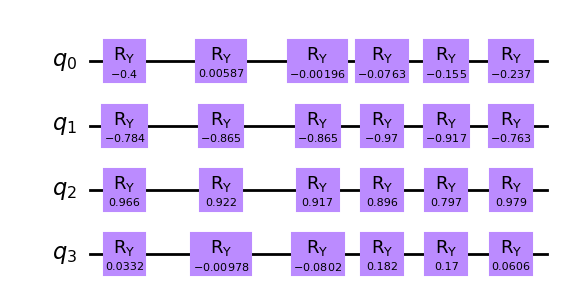

In [11]:
circuit.draw(output='mpl')